In [41]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import sys
!{sys.executable} -m pip install joblib



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
print("matplotlib + seaborn working ✅")


matplotlib + seaborn working ✅


In [44]:
import joblib
print("joblib working ✅")


joblib working ✅


In [45]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("scikit-learn working ✅")


scikit-learn working ✅


In [47]:
import os
print(os.getcwd())


c:\Users\madhu\OneDrive\Desktop\Satellite_Property_Valuation


In [48]:
os.listdir()


['24114097_final.csv',
 '24114097_report.pdf',
 'data',
 'data_fetcher.py',
 'images',
 'model_training.ipynb',
 'preprocessing.ipynb',
 'venv',
 'venv313']

In [49]:
import os
os.listdir("data")


['processed_test.csv',
 'processed_train.csv',
 'scaler.pkl',
 'test.csv',
 'train.csv']

In [50]:
import os
os.listdir()


['24114097_final.csv',
 '24114097_report.pdf',
 'data',
 'data_fetcher.py',
 'images',
 'model_training.ipynb',
 'preprocessing.ipynb',
 'venv',
 'venv313']

In [51]:
os.listdir("images")


['test', 'train']

In [52]:
print("Total rows in train.csv:", len(df))
print("Downloaded images:", len(downloaded_ids))
print("Rows after syncing:", len(df_clean))


Total rows in train.csv: 21613
Downloaded images: 1
Rows after syncing: 21419


Dataset size after lat/long filter: 21613
Synced Dataset Size: 21613 rows
Preprocessing complete! Data and Scaler saved in /data folder.


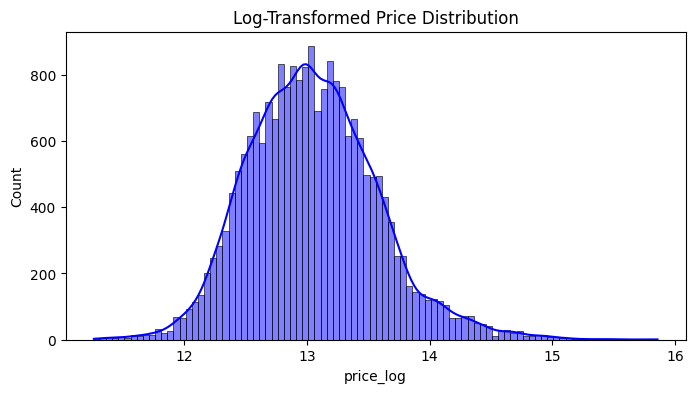

In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

os.makedirs('data', exist_ok=True)

image_folder = "images/train"
df = pd.read_csv("data/train.csv")

downloaded_ids = [str(f.split('.')[0]) for f in os.listdir(image_folder) if f.endswith('.jpg')]
df_clean = df.dropna(subset=['lat', 'long']).copy()
print("Dataset size after lat/long filter:", len(df_clean))
print(f"Synced Dataset Size: {len(df_clean)} rows")
df_clean = df_clean[df_clean['bedrooms'] < 30]
df_clean = df_clean[(df_clean['bedrooms'] > 0) & (df_clean['bathrooms'] > 0)]
df_clean = df_clean.drop_duplicates(subset='id')

df_clean['price_log'] = np.log1p(df_clean['price'])
CURRENT_YEAR = 2025
df_clean['house_age'] = CURRENT_YEAR - df_clean['yr_built']
df_clean['is_renovated'] = (df_clean['yr_renovated'] > 0).astype(int)
df_clean['sqft_lot_log'] = np.log1p(df_clean['sqft_lot'])


features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot_log', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 
            'sqft_lot15', 'lat', 'long', 'house_age', 'is_renovated']

train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_df[features])
test_features_scaled = scaler.transform(test_df[features])
def format_processed(df_original, scaled_array):
    new_df = pd.DataFrame(scaled_array, columns=features)
    new_df['id'] = df_original['id'].values
    new_df['price_log'] = df_original['price_log'].values
    return new_df

final_train = format_processed(train_df, train_features_scaled)
final_test = format_processed(test_df, test_features_scaled)

final_train.to_csv("data/processed_train.csv", index=False)
final_test.to_csv("data/processed_test.csv", index=False)
joblib.dump(scaler, 'data/scaler.pkl')

print("Preprocessing complete! Data and Scaler saved in /data folder.")

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['price_log'], kde=True, color='blue')
plt.title("Log-Transformed Price Distribution")
plt.show()